<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
دایی موند
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    به اولین تمرین از فصل‌های مدل‌سازی کالج خوش‌آمدید 😊🎉
    <br>
    هدف ما در این مسئله این است که قیمت الماس‌ها را بر اساس تعدادی از ویژگی‌های آن‌ها پیش‌بینی کنیم.
    برای حل این مسئله به سراغ الگوریتم رگرسیون خطی خواهیم رفت.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌ آموزشی‌ای که در اختیار داریم شامل ۱۰ ستون است که در جدول زیر، توضیحات هر کدام از ستون‌ها آورده شده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>carat</code>|وزن الماس به معیار قیراط|
|<code>cut</code>|کیفیت تراش‌خوردگی الماس|
|<code>color</code>|رنگ الماس از J(بدترین) تا D (بهترین)|
|<code>clarity</code>|معیار شفافیت الماس (از چپ به راست از بدترین به بهترین: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
|<code>x</code>|طول الماس به میلی‌متر|
|<code>y</code>|عرض الماس به میلی‌متر|
|<code>z</code>|عمق الماس به میلی‌متر|
|<code>depth</code>|عمق درصدی که برابر است با z / mean(x,y)|
|<code>table</code>|عرض عریض‌ترین نقطه بالایی الماس|
|<code>price</code>|قیمت الماس|

</font>
</div>
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>diamonds_train.csv</code> و نمونه‌های آزمون که باید قیمت آن‌ها را پیش‌بینی کنید در فایل <code>diamonds_test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزشی را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [2]:
train = pd.read_csv('diamonds_train.csv')
train.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
test = pd.read_csv('diamonds_test.csv') 
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.73,Ideal,G,VVS2,61.9,55.0,5.83,5.77,3.59
1,0.61,Premium,F,VVS2,59.7,58.0,5.56,5.53,3.31
2,1.55,Premium,I,VS1,58.2,60.0,7.69,7.59,4.45
3,0.46,Good,F,IF,56.2,61.0,5.16,5.24,2.92
4,1.10,Very Good,F,VS2,60.6,58.0,6.67,6.77,4.07


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

In [4]:
#TRAIN#
print(train.isnull().sum(),'the Number of Missing Data on Train')
train.describe()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64 the Number of Missing Data on Train


,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#TEST#
print(test.isnull().sum(),'the Number of Missing Data on Test')
test.describe()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64 the Number of Missing Data on Test


,carat,depth,table,x,y,z
count,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000,3940.000000
mean,0.778853,61.703706,57.448985,5.689962,5.690992,3.509264
std,0.458643,1.451353,2.264983,1.104228,1.096692,0.687537
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000
25%,0.390000,61.000000,56.000000,4.700000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,5.660000,5.660000,3.480000
75%,1.030000,62.500000,59.000000,6.520000,6.510000,4.020000
max,2.770000,68.700000,70.000000,9.110000,9.070000,6.160000


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

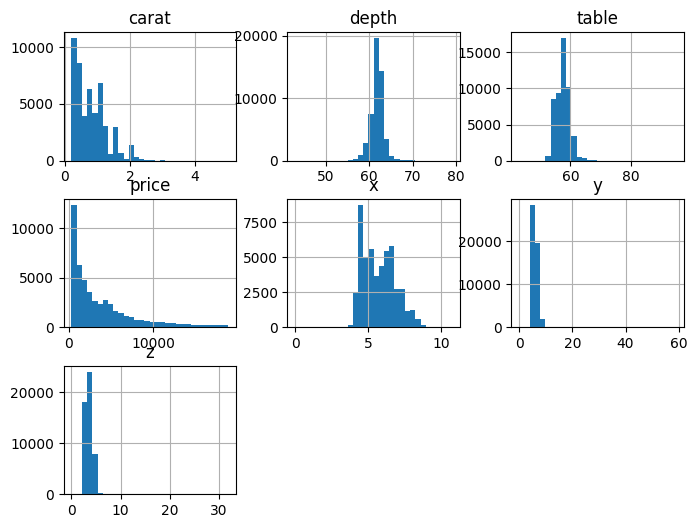

In [6]:
train.hist(bins=30,figsize=(8,6))

In [7]:
train['volume']=train['x']*train['y']*train['z']
train=train.drop(columns=['x','y','z'])
len(train)

50000

In [8]:
test['volume']=test['x']*test['y']*test['z']
test=test.drop(columns=['x','y','z'])
len(test)

3940

In [9]:
train=train[train['volume']!=0].reset_index(drop=True)
print(len(train),' after Omitted Zero Values')
Zero_count=train.apply(lambda col: (col==0).sum())
print(Zero_count,'The number of Zero Values of columns')


49983  after Omitted Zero Values
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64 The number of Zero Values of columns


In [10]:
test=test[test['volume']!=0].reset_index(drop=True)
print(len(test),' after Omitted Zero Values')
Zero_count=test.apply(lambda col: (col==0).sum())
print(Zero_count,'The number of Zero Values of columns')

3937  after Omitted Zero Values
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
volume     0
dtype: int64 The number of Zero Values of columns


<Axes: >

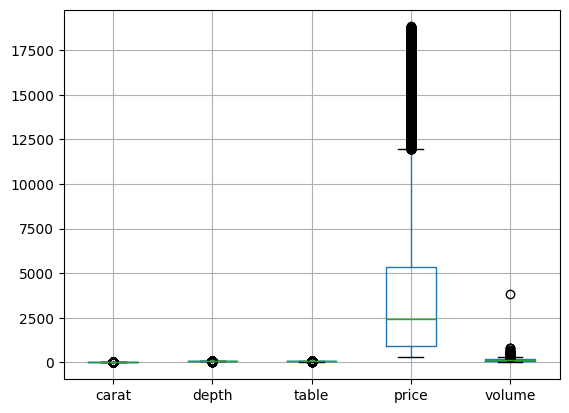

In [11]:
train.boxplot()

<Axes: >

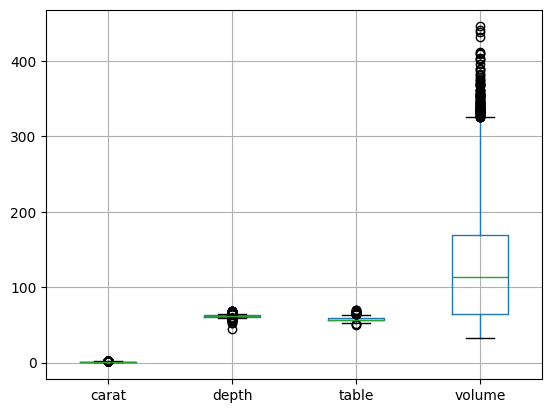

In [12]:
test.boxplot()

In [13]:
from sklearn.preprocessing import MinMaxScaler
train['volume']=np.log(train['volume']+1)
train['price']=np.log(train['price']+1)
scaler=MinMaxScaler()
train['volume']=scaler.fit_transform(train[['volume']])
train['price']=scaler.fit_transform(train[['price']])
train

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,0.000000,0.038000
1,0.21,Premium,E,SI1,59.8,61.0,0.000000,0.017222
2,0.23,Good,E,VS1,56.9,65.0,0.000753,0.037329
3,0.29,Premium,I,VS2,62.4,58.0,0.005964,0.079275
4,0.31,Good,J,SI2,63.3,58.0,0.006699,0.100946
...,...,...,...,...,...,...,...,...
49978,0.72,Ideal,D,SI1,60.8,57.0,0.526114,0.267282
49979,0.72,Good,D,SI1,63.1,55.0,0.526114,0.271176
49980,0.70,Very Good,D,SI1,62.8,60.0,0.526114,0.264626
49981,0.86,Premium,H,SI2,61.0,58.0,0.526114,0.307711


In [14]:
test['volume']=np.log(test['volume']+1)
test['volume']=scaler.fit_transform(test[['volume']])
test

,carat,cut,color,clarity,depth,table,volume
0,0.73,Ideal,G,VVS2,61.9,55.0,0.499431
1,0.61,Premium,F,VVS2,59.7,58.0,0.434122
2,1.55,Premium,I,VS1,58.2,60.0,0.792673
3,0.46,Good,F,IF,56.2,61.0,0.337422
4,1.10,Very Good,F,VS2,60.6,58.0,0.660069
...,...,...,...,...,...,...,...
3932,1.58,Premium,I,VS1,61.1,59.0,0.786648
3933,1.00,Very Good,F,SI1,63.1,59.0,0.593714
3934,1.13,Premium,H,VS1,58.9,58.0,0.661946
3935,1.51,Ideal,E,VS2,62.8,56.0,0.765331


In [15]:
cut_list=train['cut'].unique().tolist()
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
train['cut']=train['cut'].map(cut_map)
train

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,E,SI2,61.5,55.0,0.000000,0.038000
1,0.21,4,E,SI1,59.8,61.0,0.000000,0.017222
2,0.23,2,E,VS1,56.9,65.0,0.000753,0.037329
3,0.29,4,I,VS2,62.4,58.0,0.005964,0.079275
4,0.31,2,J,SI2,63.3,58.0,0.006699,0.100946
...,...,...,...,...,...,...,...,...
49978,0.72,5,D,SI1,60.8,57.0,0.526114,0.267282
49979,0.72,2,D,SI1,63.1,55.0,0.526114,0.271176
49980,0.70,3,D,SI1,62.8,60.0,0.526114,0.264626
49981,0.86,4,H,SI2,61.0,58.0,0.526114,0.307711


In [16]:
cut_list=test['cut'].unique().tolist()
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
test['cut']=test['cut'].map(cut_map)
test

,carat,cut,color,clarity,depth,table,volume
0,0.73,5,G,VVS2,61.9,55.0,0.499431
1,0.61,4,F,VVS2,59.7,58.0,0.434122
2,1.55,4,I,VS1,58.2,60.0,0.792673
3,0.46,2,F,IF,56.2,61.0,0.337422
4,1.10,3,F,VS2,60.6,58.0,0.660069
...,...,...,...,...,...,...,...
3932,1.58,4,I,VS1,61.1,59.0,0.786648
3933,1.00,3,F,SI1,63.1,59.0,0.593714
3934,1.13,4,H,VS1,58.9,58.0,0.661946
3935,1.51,5,E,VS2,62.8,56.0,0.765331


In [17]:
#'the range of Diamond's color based on quality are like these(D,E.....J)'#
color_list=train['color'].unique().tolist()
color_map={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2 ,'J':1}
train['color']=train['color'].map(color_map)
train

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,SI2,61.5,55.0,0.000000,0.038000
1,0.21,4,6,SI1,59.8,61.0,0.000000,0.017222
2,0.23,2,6,VS1,56.9,65.0,0.000753,0.037329
3,0.29,4,2,VS2,62.4,58.0,0.005964,0.079275
4,0.31,2,1,SI2,63.3,58.0,0.006699,0.100946
...,...,...,...,...,...,...,...,...
49978,0.72,5,7,SI1,60.8,57.0,0.526114,0.267282
49979,0.72,2,7,SI1,63.1,55.0,0.526114,0.271176
49980,0.70,3,7,SI1,62.8,60.0,0.526114,0.264626
49981,0.86,4,3,SI2,61.0,58.0,0.526114,0.307711


In [18]:
#'the range of Diamond's color based on quality are like these(D,E.....J)'#
color_list=test['color'].unique().tolist()
color_map={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2 ,'J':1}
test['color']=test['color'].map(color_map)
test

,carat,cut,color,clarity,depth,table,volume
0,0.73,5,4,VVS2,61.9,55.0,0.499431
1,0.61,4,5,VVS2,59.7,58.0,0.434122
2,1.55,4,2,VS1,58.2,60.0,0.792673
3,0.46,2,5,IF,56.2,61.0,0.337422
4,1.10,3,5,VS2,60.6,58.0,0.660069
...,...,...,...,...,...,...,...
3932,1.58,4,2,VS1,61.1,59.0,0.786648
3933,1.00,3,5,SI1,63.1,59.0,0.593714
3934,1.13,4,3,VS1,58.9,58.0,0.661946
3935,1.51,5,6,VS2,62.8,56.0,0.765331


In [19]:
#'the range of Diamond's clarity based on quality are like these(D,E.....J)'#
clarity_list=train['clarity'].unique().tolist()
clarity_map={'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3 ,'SI2':2,'I1':1}
train['clarity']=train['clarity'].map(clarity_map)
train


,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,0.000000,0.038000
1,0.21,4,6,3,59.8,61.0,0.000000,0.017222
2,0.23,2,6,5,56.9,65.0,0.000753,0.037329
3,0.29,4,2,4,62.4,58.0,0.005964,0.079275
4,0.31,2,1,2,63.3,58.0,0.006699,0.100946
...,...,...,...,...,...,...,...,...
49978,0.72,5,7,3,60.8,57.0,0.526114,0.267282
49979,0.72,2,7,3,63.1,55.0,0.526114,0.271176
49980,0.70,3,7,3,62.8,60.0,0.526114,0.264626
49981,0.86,4,3,2,61.0,58.0,0.526114,0.307711


In [20]:
#'the range of Diamond's clarity based on quality are like these(D,E.....J)'#
clarity_list=test['clarity'].unique().tolist()
clarity_map={'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3 ,'SI2':2,'I1':1}
test['clarity']=test['clarity'].map(clarity_map)
test

,carat,cut,color,clarity,depth,table,volume
0,0.73,5,4,6,61.9,55.0,0.499431
1,0.61,4,5,6,59.7,58.0,0.434122
2,1.55,4,2,5,58.2,60.0,0.792673
3,0.46,2,5,8,56.2,61.0,0.337422
4,1.10,3,5,4,60.6,58.0,0.660069
...,...,...,...,...,...,...,...
3932,1.58,4,2,5,61.1,59.0,0.786648
3933,1.00,3,5,3,63.1,59.0,0.593714
3934,1.13,4,3,5,58.9,58.0,0.661946
3935,1.51,5,6,4,62.8,56.0,0.765331


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده‌ها را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    الگوریتم <code>LinearRegression</code> نیز در کتابخانه‌ی <code>scikit-learn</code> به‌خوبی پیاده‌سازی شده و می‌توانیم از آن جهت اجرای الگوریتم <i>رگرسیون خطی</i> بر روی داده‌های خود کمک بگیریم.
</font>
</p>

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در سلول پایین با استفاده از کتابخانه <code>scikit-learn</code> مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
    <br>
    <b>حتما باید از مدل رگرسیون خطی یعنی <code>LinearRegression</code> استفاده کنید.</b>
</font>
</p>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=train.drop('price',axis=1)
Y=train.price
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model =LinearRegression()
model.fit(x_train,y_train)



LinearRegression()

In [33]:

x_sample=X.iloc[0:10000,:]
y_sample=Y[0:10000]
y_pred=model.predict(x_sample)
y_pred

array([-0.0252156 , -0.04230628,  0.0482429 , ...,  0.68947647,
        0.64795246,  0.61003869])

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

In [34]:
from sklearn.metrics import r2_score
r2=r2_score(y_sample,y_pred)
print(r2,' the amount of r2')


0.9525276040606824  the amount of r2


In [35]:
y_sample_normilized=scaler.inverse_transform(y_sample.values.reshape(-1,1))
y_sample_orginal=np.exp(y_sample_normilized)-1
y_pred_normilized=scaler.inverse_transform(y_pred.reshape(-1,1))
y_pred_orginal=np.exp(y_pred_normilized)-1

results=pd.DataFrame({'real price':y_sample_orginal.flatten(),'predicted price':y_pred_orginal.flatten()})
results


,real price,predicted price
0,32.291558,30.181686
1,32.291558,28.828209
2,32.356747,36.734234
3,32.811084,37.057975
4,32.875710,33.096447
...,...,...
9995,186.923317,187.609519
9996,186.923317,170.880053
9997,186.948023,198.446609
9998,186.948023,178.061343


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>80</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدل‌سازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول زیر آماده کنید.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|<code>price</code>|قیمت پیش‌بینی‌شده برای الماس|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
توجه داشته باشید که:
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium; margin-right:48px">
<font face="vazir" size=3>
    ۱. نام دیتافریم پاسخ شما حتماً باید <code>submission</code> باشد، در غیر این‌صورت سامانه‌ی داوری نمی‌تواند تلاش شما را ارزیابی کند.
    <br>
    ۲. این دیتافریم تنها شامل یک ستون با نام <code>price</code> بوده و شامل ۳۹۴۰ ردیف است.
    <br>
    ۳. ترتیب ردیف‌های دیتافریم باید دقیقاً مطابق با نمونه‌های آزمون باشد. یعنی به‌عنوان مثال اولین ردیف شما باید پیش‌بینی مدل‌تان برای نمونه‌ی آزمون اول باشد.
</font>
</p>

In [38]:
# predict test samples
X_TEST=test
Y_PRED=model.predict(X_TEST)
Y_PRED_normilized=scaler.inverse_transform(Y_PRED.reshape(-1,1))
Y_PRED_orginal=np.exp(Y_PRED_normilized)-1
submission =pd.DataFrame({'price':Y_PRED_orginal.reshape(-1)})
submission.describe()


,price
count,3937.000000
mean,758.896926
std,950.012114
min,28.306578
25%,125.456289
50%,396.894544
75%,995.297753
max,8188.509693


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [137]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
joblib.dump(model, 'model')
file_names = ['diamond.ipynb', 'submission.csv', 'model']
compress(file_names)

File Paths:
['diamond.ipynb', 'submission.csv', 'model']


<h4 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>راهنمایی</b>
</font>
</h4>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ۱. ستون‌های دسته‌ای (<i>categorical</i>) دیتافریم را می‌توانید <code>labelEncode</code> کنید.
    <br>
    ۲. فراموش نکنید که مراحل پیش‌پردازش خود را بر روی نمونه‌های آزمون نیز اعمال کنید.
</font>
</p>